<a href="https://colab.research.google.com/github/PradeepKumarM30/MachineLearningtechniques/blob/main/20MAI0030FAT/20MAI0030FAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTION : Design either a KNN or RandomForest or an SVM for a Dataset from UCI (University of California, Irvine) Repository. Organise your implementation as a sequence of steps. Include Comments. Provide the link to the dataset. Give a short insight on data. Establish the accuracy of the model.**

# **SHORT INSIGHT : The dataset is a multilabel classification problem. The goal is to predict the presence of amphibians species near the water reservoirs based on features obtained from GIS systems and satellite image. The data used was derived from GIS and satellite information, as well as from information gathered from the natural inventories that were prepared for the environmental impact assessment (EIA) reports for two planned road projects (Road A and Road B) in Poland. These reports were mostly used to gather information on the size of the amphibian population in each of the 189 occurrence sites**

# **STEP 1: Load Imports**

In [133]:
import sklearn.datasets
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,classification_report
import seaborn as sns

# **STEP 2 : Read the downloaded dataset from colab sample data directory**

In [134]:
df = pd.read_csv('/content/sample_data/dataset.csv', sep=";") #Downloaded dataset from UCI


In [135]:
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0,1,1,1,0,1,1


In [136]:
df.head(5)

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0,1,1,1,0,1,1


# **3. Data preprocessing**

In [137]:
df.info() #examine the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    int64 
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    int64 
 3   NR                  189 non-null    int64 
 4   TR                  189 non-null    int64 
 5   VR                  189 non-null    int64 
 6   SUR1                189 non-null    int64 
 7   SUR2                189 non-null    int64 
 8   SUR3                189 non-null    int64 
 9   UR                  189 non-null    int64 
 10  FR                  189 non-null    int64 
 11  OR                  189 non-null    int64 
 12  RR                  189 non-null    int64 
 13  BR                  189 non-null    int64 
 14  MR                  189 non-null    int64 
 15  CR                  189 non-null    int64 
 16  Green frogs         189 no

In [138]:
df.isna().sum().sum() #Find the NaN values in the dataset


0

In [139]:
df.drop(columns=['ID', 'Motorway'],inplace=True) # Id and motorway not so significant for the classification
df.head()

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0,0,0,0,0,0,0
1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0,1,1,0,0,1,0
2,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0,1,1,0,0,1,0
3,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0,0,1,0,0,0,0
4,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0,1,1,1,0,1,1


# **There are 189 samples. The following section analyses the diffrence between the positive and negative samples of the target labels and choose one with the smallest diffrence**

In [118]:
df["Tree frog"].value_counts() #diff = 47

0    118
1     71
Name: Tree frog, dtype: int64

In [119]:
df["Fire-bellied toad"].value_counts() #diff = 73

0    131
1     58
Name: Fire-bellied toad, dtype: int64

In [120]:
df["Common newt"].value_counts() #diff = 73
	

0    131
1     58
Name: Common newt, dtype: int64

In [121]:
df["Great crested newt"].value_counts() #diff = 147


0    168
1     21
Name: Great crested newt, dtype: int64

In [122]:
df["Green frogs"].value_counts() #diff = 27 - smallest


1    108
0     81
Name: Green frogs, dtype: int64

In [123]:
df["Brown frogs"].value_counts() #diff = 107
	

1    148
0     41
Name: Brown frogs, dtype: int64

In [124]:
df["Common toad"].value_counts() #diff = 59



1    124
0     65
Name: Common toad, dtype: int64

# **Since the green frog has the samllest diffrence in dataset I have used it as the target variable for the remaining part of the code**

In [140]:
df.drop(columns=["Fire-bellied toad","Brown frogs","Common toad","Tree frog","Common newt","Great crested newt"],inplace=True) #Drop all other targets
df.head()

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
0,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0
1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0
2,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0
3,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0
4,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0


In [126]:
from sklearn.preprocessing import StandardScaler #Standard scaling of the data
scaler = StandardScaler()
df[["SR","NR","TR","VR","SUR1","SUR2","SUR3","UR","FR","OR","RR","BR","MR","CR"]] = scaler.fit_transform(df[["SR","NR","TR","VR","SUR1","SUR2","SUR3","UR","FR","OR","RR","BR","MR","CR"]])
df.head()

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
0,-0.195806,-0.367544,-0.708806,1.594650,0.515892,-0.967387,1.266070,-0.641306,-0.628821,-2.013025,-0.928337,-0.950140,-0.160817,-0.127,0
1,-0.193638,-0.367544,0.008540,-0.688599,1.683599,0.173556,1.266070,1.645616,0.113974,-0.753718,-0.530478,-0.570486,-0.160817,-0.127,0
2,-0.204477,-0.367544,0.008540,-0.688599,1.683599,0.173556,1.266070,1.645616,2.342358,-0.753718,-0.530478,-0.570486,-0.160817,-0.127,0
3,-0.202309,-0.367544,0.008540,-1.449681,0.515892,1.314499,-1.169423,1.645616,2.342358,-3.272331,-0.928337,-0.950140,-0.160817,-0.127,0
4,-0.195806,0.281669,-0.708806,1.594650,1.683599,-0.967387,0.048323,-0.641306,-0.628821,0.455216,-0.928337,0.948131,-0.160817,-0.127,0


In [141]:
from sklearn.preprocessing import MinMaxScaler #Min max scaling
scaler = MinMaxScaler()
df[["SR","NR","TR","VR","SUR1","SUR2","SUR3","UR","FR","OR","RR","BR","MR","CR"]] = scaler.fit_transform(df[["SR","NR","TR","VR","SUR1","SUR2","SUR3","UR","FR","OR","RR","BR","MR","CR"]])
df.head()

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
0,0.00114,0.000000,0.000000,1.00,0.384615,0.1,0.9,0.0,0.00,0.333333,0.0,0.0,0.0,0.0,0
1,0.00134,0.000000,0.285714,0.25,0.692308,0.5,0.9,1.0,0.25,0.666667,0.1,0.1,0.0,0.0,0
2,0.00034,0.000000,0.285714,0.25,0.692308,0.5,0.9,1.0,1.00,0.666667,0.1,0.1,0.0,0.0,0
3,0.00054,0.000000,0.285714,0.00,0.384615,0.9,0.1,1.0,1.00,0.000000,0.0,0.0,0.0,0.0,0
4,0.00114,0.090909,0.000000,1.00,0.692308,0.1,0.5,0.0,0.00,0.986667,0.0,0.5,0.0,0.0,0


In [142]:
X_data = df.drop('Green frogs',axis=1) #Assign green frog as the target variable
Y_data = df['Green frogs']

# **STEP4: Assign the train and test data to variables**

In [143]:
from sklearn.model_selection import train_test_split    
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size = 0.2)

# **Inspect size**

In [144]:
print("X TRaIN SIZE : ",X_train.shape," X TEST SIZE : ",X_test.shape,"Y TRaIN SIZE : ",Y_train.shape,"Y TRaIN SIZE : ",Y_test.shape)

X TRaIN SIZE :  (151, 14)  X TEST SIZE :  (38, 14) Y TRaIN SIZE :  (151,) Y TRaIN SIZE :  (38,)


# **STEP 5: Train model**
# **STEP 6: Predict model with the test data**
# **STEP 7: Analyse metrics**

# **Model - KNN + Standard scaler**


Error: 0.4473684210526316
Accuracy: 0.5526315789473685


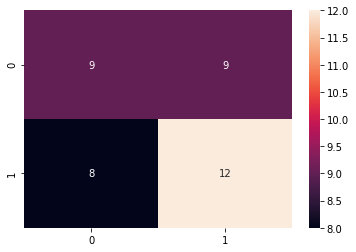

In [130]:
#Standard scaler 
from sklearn.neighbors import KNeighborsClassifier  

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
cnf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

# **Random forest + standard scaler**

Error: 0.42105263157894735
Accuracy: 0.5789473684210527


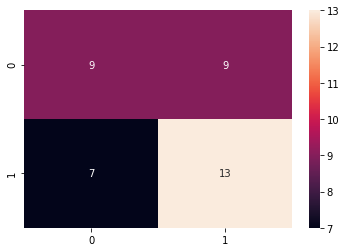

In [131]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier(criterion='gini')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
cnf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

# **SVM + Standard scaler**

Error: 0.4473684210526316
Accuracy: 0.5526315789473685


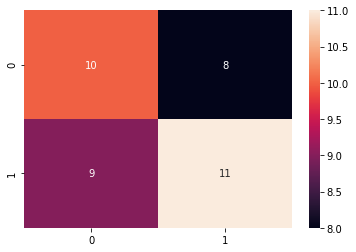

In [132]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
cnf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

# **KNN + MinMax scaler**

Error: 0.3684210526315789
Accuracy: 0.631578947368421


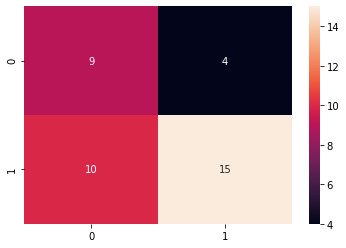

In [145]:
#Standard scaler 
from sklearn.neighbors import KNeighborsClassifier  

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
cnf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

# **Random Forest + MinMax scaler**

Error: 0.2894736842105263
Accuracy: 0.7105263157894737


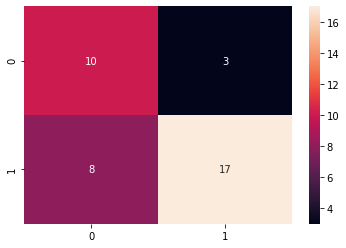

In [151]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier(criterion='gini')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
cnf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

# **SVM + Minmax Scaler**

Error: 0.3157894736842105
Accuracy: 0.6842105263157895


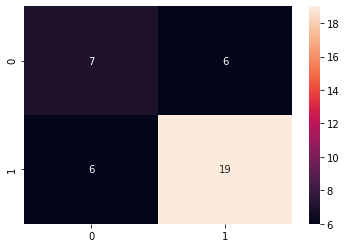

In [147]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
cnf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)